In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=1715190907&interval=1d&events=history&includeAdjustedClose=true")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3522 non-null   object 
 1   Open       3522 non-null   float64
 2   High       3522 non-null   float64
 3   Low        3522 non-null   float64
 4   Close      3522 non-null   float64
 5   Adj Close  3522 non-null   float64
 6   Volume     3522 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.7+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03
mean,16118.978034,16494.752791,15715.979545,16134.975738,16134.975738,1.717882e+10
std,17881.151000,18306.675281,17407.622272,17892.928071,17892.928071,1.926274e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1026.250000,1046.025024,1003.097519,1027.364960,1027.364960,2.222202e+08
50%,8715.845703,8885.618653,8483.786133,8723.863282,8723.863282,1.290970e+10
75%,26926.460938,27342.624512,26617.527832,26957.068848,26957.068848,2.773924e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


In [6]:
#Make two new columns which will be used for making predictions.
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [7]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [8]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [9]:
#Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

In [10]:
df.isnull().sum()

HL_Perc            0
CO_Perc            0
Adj Close          0
Volume             0
PriceNextMonth    30
dtype: int64

In [11]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
3517,3.028155,1.590754,63891.472656,20620477992,NaN
3518,2.629780,0.217052,64031.132813,18296164805,NaN
3519,4.380604,-1.368498,63161.949219,28697928697,NaN
3520,3.378732,-1.310812,62334.816406,25930730982,NaN
3521,3.464285,-1.836436,61187.941406,26088172222,NaN


In [12]:
#Make fetaure and label arrays
X = np.array(df.drop(["PriceNextMonth"], axis=1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

c:\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [13]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [14]:
#Define the prediction model
model = RandomForestRegressor()

In [15]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9331304023447861


In [17]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [18]:
predictions = model.predict(X_Check)

In [19]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame
print(result)

            ClosePrice      Forecast
Date                                
2014-09-17  457.334015           NaN
2014-09-18  424.440002           NaN
2014-09-19  394.795990           NaN
2014-09-20  408.903992           NaN
2014-09-21  398.821014           NaN
...                ...           ...
2024-05-04         NaN  59982.313907
2024-05-05         NaN  57276.238399
2024-05-06         NaN  55401.228672
2024-05-07         NaN  59989.986055
2024-05-08         NaN  57563.435742

[3522 rows x 2 columns]


Text(0, 0.5, 'Price')

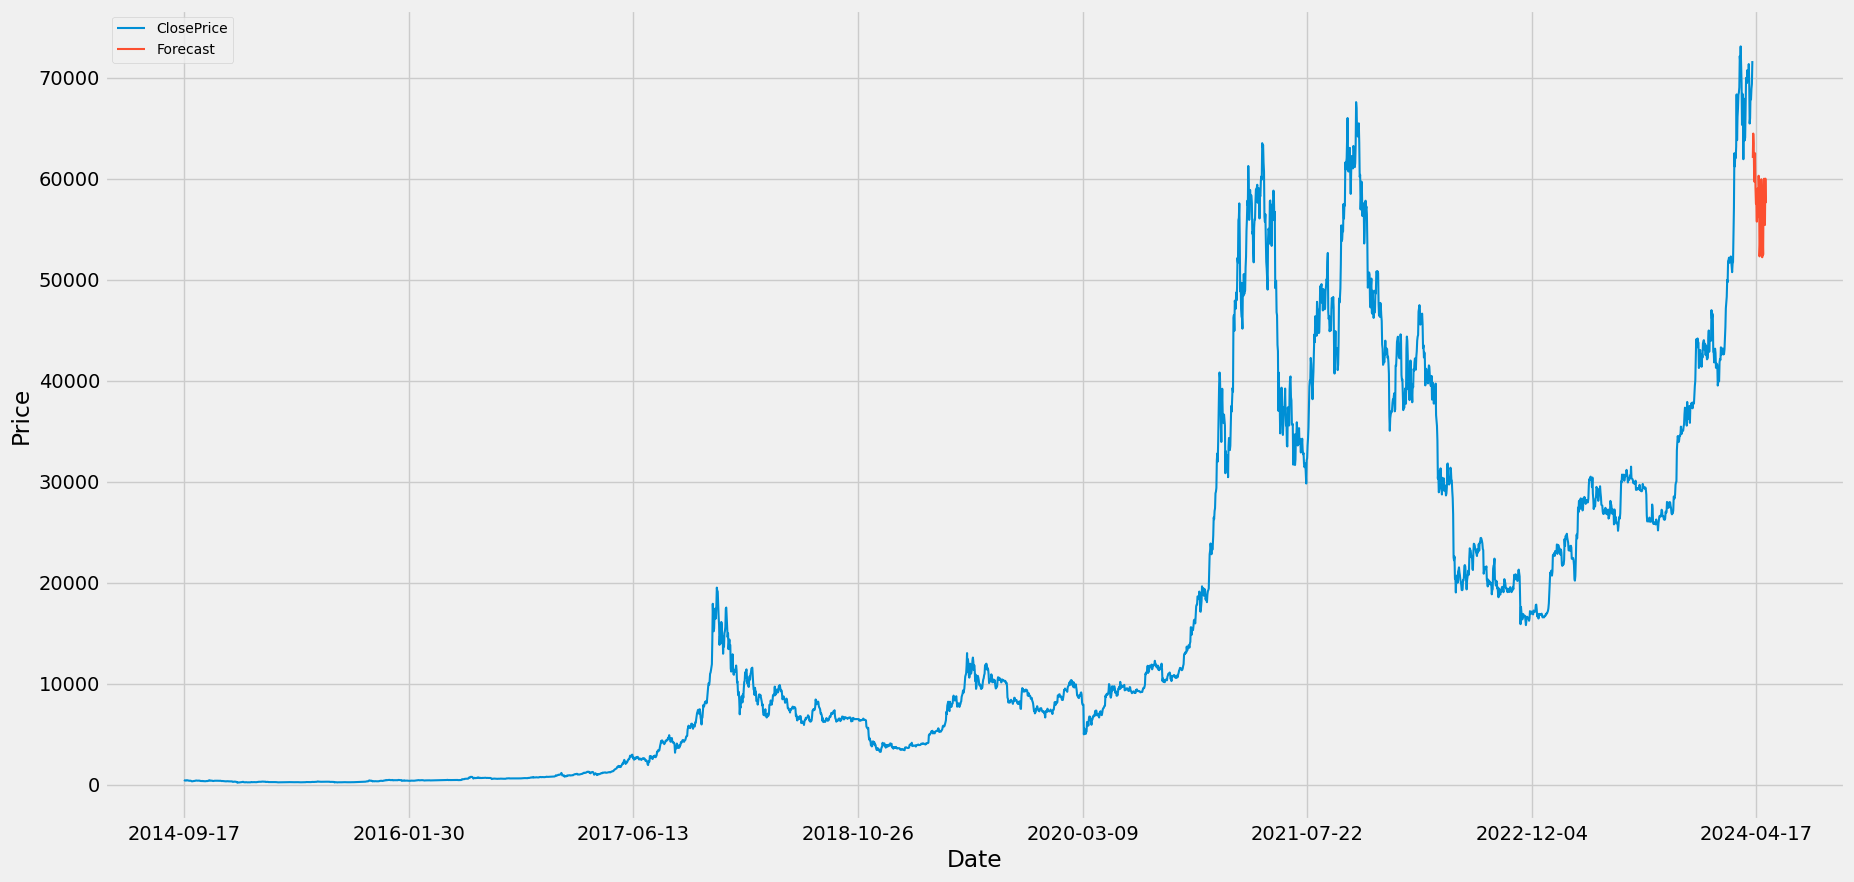

In [20]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':10})
plt.xlabel('Date')
plt.ylabel('Price')


In [21]:
import pickle 
pickle_out = open("model.pkl", "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()